In [18]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap
from pathlib import Path

sys.path.append("..")

In [19]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)
from plot import get_colormap

In [37]:
def V(x: npt.NDArray) -> npt.NDArray:
    
    return np.max(x,0,axis=0)

x = np.array([
    [-1, 0, 1],
    [2, 3, 0]
])

a = x.reshape(-1)

print(V(a))

3


In [3]:
# delete_all()

In [6]:
particle: int | None = 1000
ensemble: int | None = 1000
sampling: int | None = 100
slope: float | None = None
Lambda: float | None = None
potential: int | None = 4

df = load_result(conditions=get_conditions(
    N_particle = particle,
    N_ensemble = ensemble,
    velocity = None,
    slope = slope,
    Lambda = Lambda,
    boundary = 5.0,
    N_bins = None,
    gamma = 1.0,
    temperature = 0.001,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.001,
    initial = None,
    sampling = None,
    interval = None,
    potential = potential,
    )
)

# df = df[(df["velocity"] >= 0.01) & (df["velocity"] <= 0.1)]
# df[(df["slope"] >= 0.3)]
df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,interval,potential,drag,std,time
66,1b8440,1000,1000,0.001000,0.1,5.0,40,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,2.225,1.457271,12107.660148
63,305071,1000,1000,0.001259,0.1,5.0,40,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,0.940,1.400564,12023.529022
117,618899,1000,1000,0.001585,0.1,5.0,40,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,2.938,1.383334,12242.844729
55,57e4d1,1000,1000,0.001995,0.1,5.0,40,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,2.018,1.396809,12212.534080
95,d90dba,1000,1000,0.002512,0.1,5.0,40,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,-0.052,1.412355,12261.550432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,218cc3,1000,1000,0.398100,0.4,5.0,40,1.0,0.4,0.001,1.0,1.0,0.001,10000,100,1000,4,5376.771,5.253289,12955.959809
19,3cabf7,1000,1000,0.501200,0.4,5.0,40,1.0,0.4,0.001,1.0,1.0,0.001,10000,100,1000,4,6424.031,5.172997,12716.086965
75,286861,1000,1000,0.631000,0.4,5.0,40,1.0,0.4,0.001,1.0,1.0,0.001,10000,100,1000,4,7443.415,4.912825,12678.923276
121,aa0015,1000,1000,0.794300,0.4,5.0,40,1.0,0.4,0.001,1.0,1.0,0.001,10000,100,1000,4,8299.114,4.721914,12727.857195


In [7]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['1b8440', '305071', '618899', '57e4d1', 'd90dba', '15a899', '062e48', '856362', '5835a8', 'e11fbc', 'a6e2c3', 'd67977', 'e2eee2', 'a942f2', 'aca26c', '968c7d', '8df452', '4b2a85', 'c81fea', 'b0a19e', 'deee17', '88fb65', '2614c3', '1719f6', 'b5e82f', '360415', 'cd16bc', '9db507', 'e4a1b9', '3b1a4e', '548445', '4fda5e', 'd29a13', '4fadf7', '7fb9ad', 'ecc70c', '2d7dc1', '1829cc', '5e177f', '2135d8', '03739b', '1776af', '62a803', '6cae3f', '24b39b', 'ea67dc', '0ebba7', '3d1efa', '145571', 'aa057c', 'eec9c1', '2d5db0', 'b9db9e', '0380d7', '31b1d2', 'bf649f', '1614ad', '2c67fa', '335963', '7d4303', 'a5ad78', '647675', '38d5ad', '2906b7', '378e32', '56e2b0', 'de4c7d', '81cabb', '640119', 'ee7f83', '7667d6', '664a0d', '386443', '697e59', '4e10fa', '9c5c1e', 'b764c2', '70c2e0', '0b0dad', 'af4d27', '9d1536', 'c2d260', '1ff7e8', 'cc740b', '2eec7e', 'b2e3fb', '79836f', '93e00d', 'bd7329', 'eb174a', '09fc09', '3f0224', 'fbfb6c', '6ec25f', 'd5d3fa', '49d107', 'f95532', '4cc547', '810d8d', '5b95f9',

In [13]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")

available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0])
# available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
print(f"velocity = {available_velocity}")

data = 4 x 4 x 31 = 496
slope = [0.1, 0.2, 0.3, 0.4]
Lambda = [0.1, 0.2, 0.3, 0.4]
velocity = [0.001    0.001259 0.001585 0.001995 0.002512 0.003162 0.003981 0.005012
 0.00631  0.007943 0.01     0.01259  0.01585  0.01995  0.02512  0.03162
 0.03981  0.05012  0.0631   0.07943  0.1      0.1259   0.1585   0.1995
 0.2512   0.3162   0.3981   0.5012   0.631    0.7943   1.      ]


In [14]:
drag, std = [], []

for velocity in available_velocity:
    drag.append(get_drag_by_velocity(df, velocity=velocity))
    std.append(get_std_by_velocity(df, velocity=velocity))

drag, std = np.array(drag), np.array(std)
print(drag.shape)

# nrows, ncols = 4, 4

# fig, axs = plt.subplots(nrows, ncols, figsize=(15,12))

# for i in range(nrows):
#     for j in range(ncols):
#         ax = axs[i,j]
#         ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
#         ax.set_xlabel("velocity", fontsize=20)
#         ax.set_ylabel("drag", fontsize=20)
#         ax.plot(available_velocity, drag[:,i,j])
#         ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
#         ax.axhline(0, linestyle="--", color="black")
#         ax.set_xscale("log")
#         # ax.set_xlim([0, 0.01])
#         # ax.set_ylim([None, 1e6])

# fig.tight_layout()
# # plt.savefig(f"fig/drag ptcl={particle} ensemble={ensemble} variable={len(available_Lambda)*len(available_slope)}.jpg")
# plt.show()

(31, 4, 4)


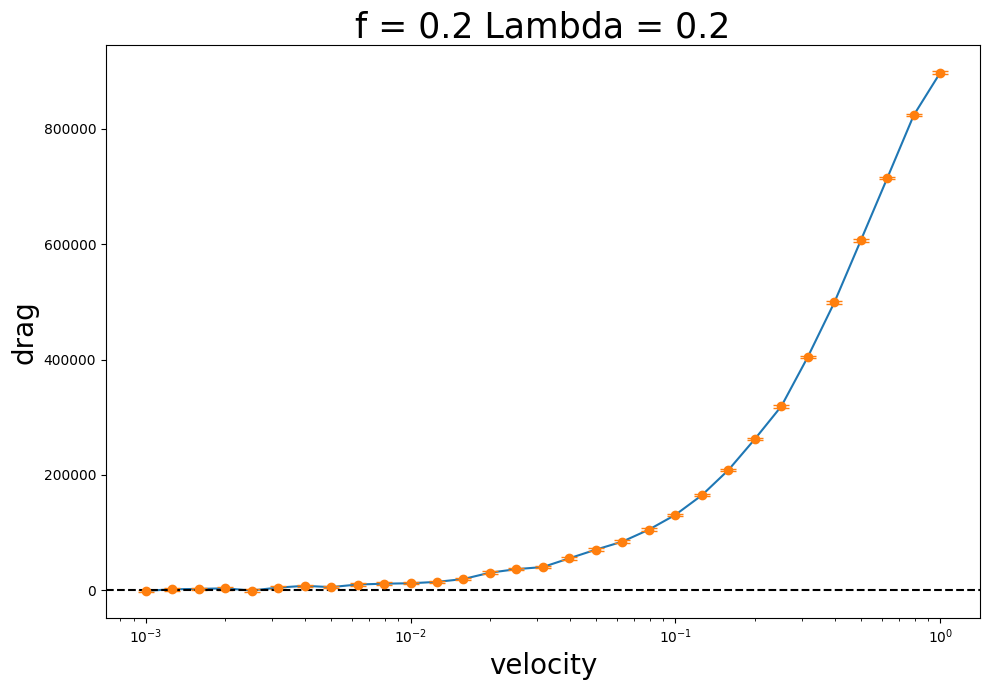

In [16]:
fig, ax = plt.subplots(figsize=(10,7))

f, d = 0.2, 0.2

i, j = available_slope.index(f), available_Lambda.index(d)

ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
ax.set_xlabel("velocity", fontsize=20)
ax.set_ylabel("drag", fontsize=20)
ax.plot(available_velocity, drag[:,i,j])
ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
ax.axhline(0, linestyle="--", color="black")
ax.set_xscale("log")
# ax.set_xlim([0, 0.01])
# ax.set_ylim([None, 1e6])

fig.tight_layout()
Path(f"fig/{potential}/drag_by_velocity").mkdir(parents=True, exist_ok=True)
# plt.savefig(f"fig/{potential}/drag_by_velocity/ptcl={particle} ens={ensemble} f={f} d={d}.jpg")
plt.show()

In [ ]:
# available_slope, available_Lambda, available_velocity = sorted(
#     set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
# print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
# print(f"slope = {available_slope}")
# print(f"Lambda = {available_Lambda}")

available_slope = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]
available_Lambda = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]

# available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0])
available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
# print(f"velocity = {available_velocity}")

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/{potential}/drag/AOUP drag, ptcl={particle} ens={ensemble} sam={sampling}")
plt.show()

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

    cvals  = [min(data.min(), -1), 0, data.max()]
    colors = ["red","white","blue"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

    # c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    
    # if i == 5: sys.exit()

    ax.set_title(f"velocity v={np.round(velocity, 3)}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    # ax.set_xlim([1.e-1, 1.e0])|
    # ax.set_ylim([1.e-1, 1.e0])
    
    cbar = plt.colorbar(c)

fig.tight_layout()
plt.savefig(f"./fig/{potential}/drag/AOUP drag, ptcl={particle} ens={ensemble} sam={sampling}")
plt.show()

In [ ]:
import scipy.stats

fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"Negative drag T-test P-value, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity=available_velocity[i]

    drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
    std = get_std_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

    Z = drag / std
    Z[np.isnan(Z)] = 0.0
    p_value = scipy.stats.norm.cdf(Z)
    # print(p_value.min())
    
    cvals  = [0.15, 0.16]
    colors = ["black","white"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

    c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
                      cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-1, 1.e0])
    ax.set_ylim([1.e-1, 1.e0])

    # cbar = plt.colorbar(c)

fig.tight_layout()
plt.savefig(f"./fig/{potential}/test/T-test, ptcl={particle} ens={ensemble} sam={sampling}")
plt.show()

In [ ]:
# from scipy.stats import norm

# fig, axs = plt.subplots(3, 3, figsize=(15,12))
# fig.suptitle(f"Positive drag T-test P-value, ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0

#     p_value = 1 - norm.cdf(Z)
#     # p_value[np.isnan(p_value)] = 1.e-10
#     # print(p_value)
#     # print(p_value.min())

#     # c = ax.contourf(available_slope, available_Lambda, p_value,
#     #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                 norm=LogNorm(vmin=1.e-15, vmax=1.e-2), cmap="binary_r")

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-3, 1.e+1])
#     ax.set_ylim([1.e-3, 1])

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/Positive Drag T-Test P-value, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

In [ ]:
# fig, ax = plt.subplots()
# velocity = 1.0

# drag = get_drag_by_velocity(df, velocity=velocity)
# print(np.log10(drag.max()), np.log10(-drag.min()))

# cvals  = [1, drag.max()]
# colors = ["white", "black"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
#                   norm=norm, cmap=cmap)

# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# ax.set_title(f"AOUP drag, velocity={velocity}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")

# cbar = plt.colorbar(c)
# plt.show()

In [ ]:
# fig, ax = plt.subplots()

# data = get_log_scale(df, velocity=velocity)

# cvals  = [data.min(), 0, data.max()]
# colors = ["red","white","blue"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

# c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

# ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# drag = get_drag_by_velocity(df, velocity=velocity)
# std = get_std_by_velocity(df, velocity=velocity)

# Z = drag / std
# Z[np.isnan(Z)] = 0.0

# p_value = scipy.stats.norm.cdf(Z)
# # print(p_value)
# print(p_value.min())

# fig, ax = plt.subplots()

# cvals = [1.e-4, 1]
# colors = ["black", "white"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# # c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
# #                norm=norm, cmap=cmap)
# c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                norm=norm, cmap=cmap)

# ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()